In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

### data

In [48]:
df = pd.read_csv('data/taxis.csv')

df['pickup_date'] = df['pickup'].astype('datetime64[ns]').dt.date
# print(f"{df['pickup_date'].dtype = }")
# df['pickup_date']

tdf = df.groupby(["pickup_date", "pickup_borough"], dropna=False, observed=False)['pickup_date'].count().unstack().fillna(0)
tdf.columns = tdf.columns.astype(str).str.lower()
print(tdf.head().to_string())

pickup_borough  bronx  brooklyn  manhattan  queens  nan
pickup_date                                            
2019-02-28        0.0       0.0        0.0     1.0  0.0
2019-03-01        7.0      17.0      193.0    22.0  2.0
2019-03-02        0.0      10.0      171.0    17.0  0.0
2019-03-03        3.0      22.0      129.0    14.0  1.0
2019-03-04        5.0      10.0      131.0    25.0  0.0


In [49]:
tdf_pct = tdf.div(tdf.sum(axis=1), axis=0)
print(tdf_pct.head().to_string())

pickup_borough     bronx  brooklyn  manhattan    queens       nan
pickup_date                                                      
2019-02-28      0.000000  0.000000   0.000000  1.000000  0.000000
2019-03-01      0.029046  0.070539   0.800830  0.091286  0.008299
2019-03-02      0.000000  0.050505   0.863636  0.085859  0.000000
2019-03-03      0.017751  0.130178   0.763314  0.082840  0.005917
2019-03-04      0.029240  0.058480   0.766082  0.146199  0.000000


### content

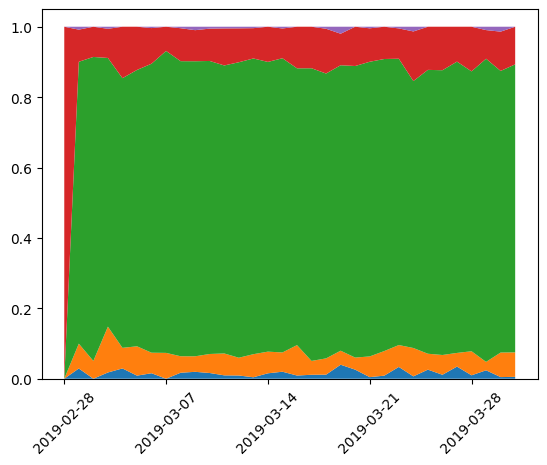

In [61]:
fig, ax = plt.subplots()

ax.stackplot(tdf_pct.index, *[tdf_pct[arg] for arg in tdf_pct.columns], labels=tdf_pct.columns)
_ = ax.set_xticks(tdf_pct.index[::7], labels = tdf_pct.index[::7], rotation=45)

### addons